[1](https://blog.csdn.net/Yuancccc/article/details/90699008)  
[docs](https://docs.scipy.org/doc/scipy/reference/index.html)  
[2](https://blog.csdn.net/pythoncsdn111/article/details/98395661)  
[scipy](https://docs.scipy.org/doc/scipy/reference/tutorial/)  
[3](https://blog.csdn.net/m0_37468171/article/details/89928102)

## 导包

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'  #默认为'last'
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import sys
import random
from numpy import linalg

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'  #默认为'last'

from matplotlib.pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']   #显示中文
mpl.rcParams['axes.unicode_minus']=False       #显示负号
np.set_printoptions(threshold=np.inf, precision=2,suppress=True)

介绍
基本功能
特殊功能（scipy.special）
整合（scipy.integrate）
优化（scipy.optimize）
插值（scipy.interpolate）
傅立叶变换（scipy.fftpack）
信号处理（scipy.signal）
线性代数（scipy.linalg）
ARPACK的稀疏特征值问题
压缩稀疏图例程（scipy.sparse.csgraph）
空间数据结构和算法（scipy.spatial）
统计数据（scipy.stats）
多维图像处理（scipy.ndimage）
文件IO（scipy.io）


集群包（scipy.cluster）
常数（scipy.constants）
离散傅立叶变换（scipy.fftpack）
集成和ODE（scipy.integrate）
插值（scipy.interpolate）
输入和输出（scipy.io）
线性代数（scipy.linalg）
杂项例程（scipy.misc）
多维图像处理（scipy.ndimage）
正交距离回归（scipy.odr）
优化和根查找（scipy.optimize）
信号处理（scipy.signal）
稀疏矩阵（scipy.sparse）
稀疏线性代数（scipy.sparse.linalg）
压缩稀疏图例程（scipy.sparse.csgraph）
空间算法和数据结构（scipy.spatial）
特殊功能（scipy.special）
统计函数（scipy.stats）
掩码数组的统计函数（scipy.stats.mstats）
低级回调函数


# 线性代数

In [65]:
from scipy import linalg
import numpy as np
arr = np.array([[1, 2], [3, 4]])  # 定义矩阵 #
print ("Det:", linalg.det(arr))# 求行列式 #
print ("Inv:", linalg.inv(arr))# 求逆矩阵 #
b = np.array([6,14])
print ("Sol:",linalg.solve(arr,b))#解方程组#
print ("Eig:",linalg.eig(arr))#求特征值#
print ("LU:",linalg.lu(arr))
print ("QR:",linalg.qr(arr))
print ("SVD:",linalg.svd(arr))
print ("Schur:",linalg.schur(arr))


Det: -2.0
Inv: [[-2.   1. ]
 [ 1.5 -0.5]]
Sol: [2. 2.]
Eig: (array([-0.37+0.j,  5.37+0.j]), array([[-0.82, -0.42],
       [ 0.57, -0.91]]))
LU: (array([[0., 1.],
       [1., 0.]]), array([[1.  , 0.  ],
       [0.33, 1.  ]]), array([[3.  , 4.  ],
       [0.  , 0.67]]))
QR: (array([[-0.32, -0.95],
       [-0.95,  0.32]]), array([[-3.16, -4.43],
       [ 0.  , -0.63]]))
SVD: (array([[-0.4 , -0.91],
       [-0.91,  0.4 ]]), array([5.46, 0.37]), array([[-0.58, -0.82],
       [ 0.82, -0.58]]))
Schur: (array([[-0.37, -1.  ],
       [ 0.  ,  5.37]]), array([[-0.82, -0.57],
       [ 0.57, -0.82]]))


# 优化


## 拟合  
* curve_fit
* 返回值
* popt
    拟合的参数值，与函数的参数个数相同
* pcov
    对角线元素为参数的方差

array([1.03, 1.8 ])

array([[ 0.  , -0.01],
       [-0.01,  0.04]])

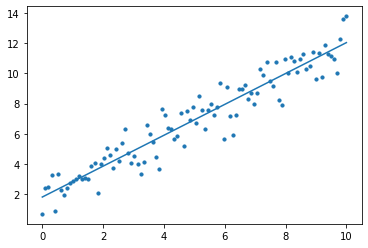

In [15]:
from scipy.optimize import curve_fit
# Creating a function to model and create data
def func(x, a, b):
    return a*x+b
# Generating clean data
x = np.linspace(0, 10, 100)
# x
y = func(x, 1, 2)
# y
# Adding noise to the data
yn = y + 0.9 * np.random.normal(size=len(x))
# yn
# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, x, yn)
# popt returns the best fit values for parameters of
# the given model (func).
popt # 拟合的斜率和截距
pcov # The estimated covariance of popt
y2 = func(x,popt[0],popt[1])
plt.scatter(x,yn,s=10)
plt.plot(x,y2)

array([ 1.  ,  5.04, -2.07])

array([[ 0.  , -0.  ,  0.  ],
       [-0.  ,  0.01, -0.  ],
       [ 0.  , -0.  ,  0.01]])

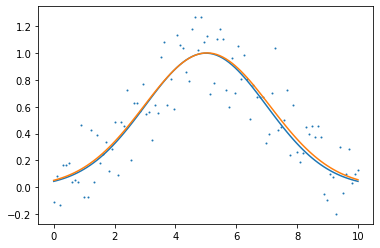

In [19]:
# Creating a function to model and create data
def func(x, a, b, c):
    return a*np.exp(-(x-b)**2/(2*c**2))
# Generating clean data
x = np.linspace(0, 10, 100)
y = func(x, 1, 5, 2)
# Adding noise to the data
yn = y + 0.2 * np.random.normal(size=len(x))
# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, x, yn)

popt # 拟合的数据
pcov # The estimated covariance of popt

y2 = func(x,*popt)
plt.scatter(x,yn,s=1)
plt.plot(x,y)
plt.plot(x,y2)

array([ 1.03,  3.05,  0.98, -1.99, 15.01,  0.52])

array([[ 0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  ],
       [-0.  , -0.  ,  0.  , -0.  , -0.  , -0.  ],
       [ 0.  ,  0.  , -0.  ,  0.01, -0.  ,  0.  ],
       [ 0.  , -0.  , -0.  , -0.  ,  0.  , -0.  ],
       [ 0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  ]])

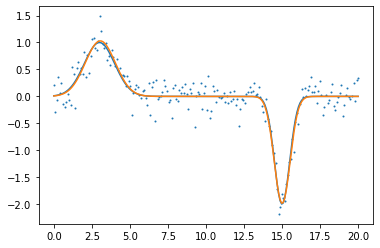

In [20]:
# Two-Gaussian model
def func(x, a0, b0, c0, a1, b1,c1):
    return a0*np.exp(-(x - b0) ** 2/(2 * c0 ** 2))+ a1 * np.exp(-(x - b1) ** 2/(2 * c1 ** 2))
# Generating clean data
x = np.linspace(0, 20, 200)
y = func(x, 1, 3, 1, -2, 15, 0.5)
# Adding noise to the data
yn = y + 0.2 * np.random.normal(size=len(x))
# Since we are fitting a more complex function,
# providing guesses for the fitting will lead to
# better results.
guesses = [1, 3, 1, 1, 15, 1]
# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, x, yn,
p0=guesses)

popt # 拟合的数据
pcov # The estimated covariance of popt

y2 = func(x,*popt)
plt.scatter(x,yn,s=1)
plt.plot(x,y)
plt.plot(x,y2)

## 解方程
* root
* fsolve()  
    fsolve(func, x0, args=(), fprime=None, full_output=0, col_deriv=0, xtol=1.49012e-08, maxfev=0, band=None, epsfcn=None, factor=100, diag=None)  
    x0: 根的估计值  
    args: 传入函数的参数

注意在fsolve函数里，得注明前多少个f的参数是我们方程中要求解的变量(x0的长度)，哪些是方程中的参数(args) 

对于具有多个根的方程，x0的具体数值很重要，因为初解很大程度上决定了根收敛的方向。 
为了求得靠近两分布中心位置的根，初解最好选为两均值的均值，在这里我们将x0设为(2+3)/2=2.5 
如果设为1，可以看到Difference在1处的导数几乎为0，因而根会收敛得非常奇葩，实际操作做了一下，输出的结果为[-152.18013068]，远远偏离分布中心位置。因为fsolve有一个默认参数xtol=1.49012e-08，只要当两次迭代结果之间的差值小于xtol就会终止迭代，所以不难理解为什么方程只有两个不大的根，却得出了一个这么奇怪的结果。 
如果将x0设为0，就可以得到另一个根：[-4.75505152]，这个是较为远离分布中心的根。

因为在这里我们只求解一个变量x，所以在定义函数的时候，只需返回一个值（一个约束），如果是求解多元方程，则在定义函数的时候返回一个list即可，fsolve会自动求使得list的所有元素均为0的根


array([-3.,  3.])

    fjac: array([[-0.89, -0.45],
       [ 0.45, -0.89]])
     fun: array([-0., -0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([0., 0.])
       r: array([ 4.47, -3.58, -2.68])
  status: 1
 success: True
       x: array([-3.,  3.])

scipy.optimize.optimize.OptimizeResult

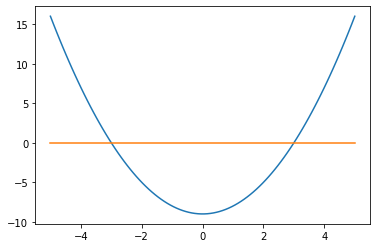

In [104]:
# from sympy import plot
from scipy.optimize import fsolve, root
x = np.linspace(-5,5,100)
line = lambda x:x**2-9
y=line(x)
y0 = np.zeros_like(x)
solution = fsolve(line,[-1,1])
solution
root_solution = root(line,[-1,1])
root_solution # 信息比较多

plt.plot(x,y)
plt.plot(x,y0)

array([13.41, 18.11, 31.78, 37.08, 39.85, 43.83])

array([-0.37, -0.32, -0.18, -0.13, -0.1 , -0.06])

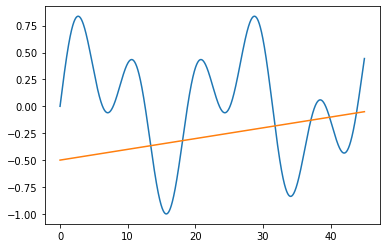

In [47]:
# Defining function to simplify intersection solution
def findIntersection(func1, func2, x0):
    return fsolve(lambda x : func1(x) - func2(x), x0)
# Defining functions that will intersect
funky = lambda x : np.cos(x / 5) * np.sin(x / 2)
line = lambda x : 0.01 * x - 0.5
# Defining range and getting solutions on intersection points
x = np.linspace(0,45,10000)
result = findIntersection(funky, line, [15, 20, 30, 35, 40, 45])
# Printing out results for x and y
result
line(result)
y=funky(x)-line(x)
y0 = np.zeros_like(x)
y1 = funky(x)
y2 = line(x)

plt.plot(x,y1)
plt.plot(x,y2)

### 求解方程

[ref](https://blog.csdn.net/ouening/article/details/78653774)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, '$2sin(x)$ and $x-1$')

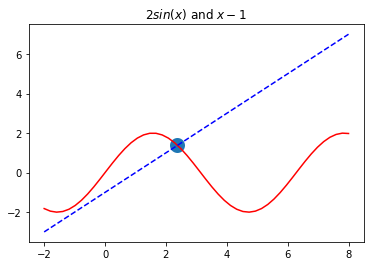

In [110]:
from scipy.optimize import root
## 1、求解f(x)=2*sin(x)-x+1
rangex1 = np.linspace(-2, 8)
rangey1_1, rangey1_2 = 2 * np.sin(rangex1), rangex1 - 1
plt.figure(1)
plt.plot(rangex1, rangey1_1, 'r', rangex1, rangey1_2, 'b--')
plt.title('$2sin(x)$ and $x-1$')


def f1(x):
    return np.sin(x) * 2 - x + 1


sol1_root = root(f1, [2])
sol1_fsolve = fsolve(f1, [2])
plt.scatter(sol1_fsolve, 2 * np.sin(sol1_fsolve), linewidths=9)
plt.show()


### 求解线性方程组

In [117]:
## 2、求解线性方程组{3X1+2X2=3;X1-2X2=5}
def f2(x):
    return np.array([3 * x[0] + 2 * x[1] - 3, x[0] - 2 * x[1] - 5])

sol2_root = root(f2, [0, 0])
sol2_fsolve = fsolve(f2, [0, 0])
print(sol2_fsolve)  # [2. -1.5]
sol2_root
sol2_fsolve

a = np.array([[3, 2], [1, -2]])
b = np.array([3, 5])
x = np.linalg.solve(a, b)
print(x)  # [2. -1.5]


[ 2.  -1.5]


    fjac: array([[-0.95, -0.32],
       [ 0.32, -0.95]])
     fun: array([0., 0.])
 message: 'The solution converged.'
    nfev: 5
     qtf: array([-0., -0.])
       r: array([-3.16, -1.26,  2.53])
  status: 1
 success: True
       x: array([ 2. , -1.5])

array([ 2. , -1.5])

[ 2.  -1.5]


### 求解非线性方程组

In [123]:
## 3、求解非线性方程组
def f3(x):
    return np.array([
        2 * x[0]**2 + 3 * x[1] - 3 * x[2]**3 - 7,
        x[0] + 4 * x[1]**2 + 8 * x[2] - 10,
        x[0] - 2 * x[1]**3 - 2 * x[2]**2 + 1
    ])

sol3_root = root(f3, [0, 0, 0])
sol3_fsolve = fsolve(f3, [0, 0, 0])
print(sol3_fsolve)


[1.53 0.97 0.58]


### 非线性方程

[-0.    3.14  6.28  9.42]


'****'

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, '$sin(2x-\\pi)e^{-x/5}$ and $sin(x)$')

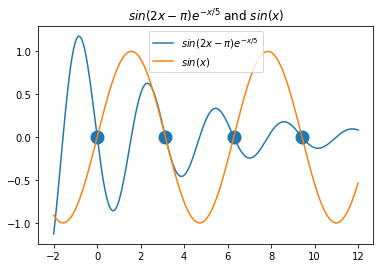

In [114]:
## 4、非线性方程
def f4(x):
    return np.array(np.sin(2 * x - np.pi) * np.exp(-x / 5) - np.sin(x))

init_guess = np.array([[0], [3], [6], [9]])
sol4_root = root(f4, init_guess)
sol4_fsolve = fsolve(f4, init_guess)
print(sol4_fsolve)
"****"
t = np.linspace(-2, 12, 2000)
y1 = np.sin(2 * t - np.pi) * np.exp(-t / 5)
y2 = np.sin(t)
plt.figure(2)
a, = plt.plot(t, y1, label='$sin(2x-\pi)e^{-x/5}$')
b, = plt.plot(t, y2, label='$sin(x)$')
plt.scatter(sol4_fsolve, np.sin(sol4_fsolve), linewidths=8)
plt.title('$sin(2x-\pi)e^{-x/5}$ and $sin(x)$')
plt.legend()

### 参数

In [125]:
# x0 和 args
#定义函数（方程f(x|arg)=0）
# def f(x,*arg):
#     f1 = lambda x: np.exp(-(x - arg[0])**2 / 2 / arg[2]**2) / arg[2] / np.sqrt(
#         2 * np.pi)
#     f2 = lambda x: np.exp(-(x - arg[1])**2 / 2 / arg[3]**2) / arg[3] / np.sqrt(
#         2 * np.pi)
#     return(f1-f2)


def f(x, *arg):  #len(arg)=4, arg=(miu_1,miu_2,sigma_1,sigma_2)

    f1 = math.exp(-(x - arg[0])**2 / 2 / arg[2]**2) / arg[2] / math.sqrt(
        2 * math.pi)
    f2 = math.exp(-(x - arg[1])**2 / 2 / arg[3]**2) / arg[3] / math.sqrt(
        2 * math.pi)
    return (f1 - f2)


x0 = (2.5, 2, 3, 4, 5)

result = fsolve(f, x0=x0[0], args=x0[1:])  # args是要传入函数f的参数
result

# print(result)
# #输出：[ 5.19949597]
x = np.linspace(0, 10, 100)
x0[1:]
# y = f(x, *x0[1:]) # 这么写不行
# plt.plot(x,y)
# y

array([5.2])

(2, 3, 4, 5)

In [67]:
# lambda 函数组合
def f(func1, func2):
    return lambda x: func1(x) - func2(x)


# Defining functions that will intersect
f1 = lambda x: np.cos(x / 5) * np.sin(x / 2)
f2 = lambda x: 0.01 * x - 0.5
f3 = f(f1, f2)
x = 1
f3(3)

1.2932681381381785

# 插值

In [129]:
from scipy.interpolate import interp1d
# Setting up fake data
x = np.linspace(0, 10 * np.pi, 20)
y = np.cos(x)
# Interpolating data
fl = interp1d(x, y, kind='linear')
fq = interp1d(x, y, kind='quadratic')

# x.min and x.max are used to make sure we do not
# go beyond the boundaries of the data for the
# interpolation.
xint = np.linspace(x.min(), x.max(), 10)
yintl = fl(xint)
yintq = fq(xint)
yintl
yintq

<function __main__.f1(x)>

array([ 1.  , -0.85,  0.65, -0.4 ,  0.14,  0.14, -0.4 ,  0.65, -0.85,
        1.  ])

array([ 1.  , -0.95,  0.78, -0.52,  0.18,  0.18, -0.52,  0.78, -0.95,
        1.  ])

In [133]:
from scipy.interpolate import UnivariateSpline
# Setting up fake data with artificial noise
sample = 30
x = np.linspace(1, 10 * np.pi, sample)
y = np.cos(x) + np.log10(x) + np.random.randn(sample) / 10
# Interpolating the data
f = UnivariateSpline(x, y, s=1)
# x.min and x.max are used to make sure we do not
# go beyond the boundaries of the data for the
# interpolation.
xint = np.linspace(x.min(), x.max(), 10)
yint = f(xint)
yint


array([0.6 , 0.61, 0.88, 0.9 , 1.25, 1.62, 0.6 , 2.2 , 0.72, 2.58])

In [136]:
from scipy.interpolate import griddata
# Defining a function
ripple = lambda x, y: np.sqrt(x**2 + y**2)+np.sin(x**2 + y**2)
# Generating gridded data. The complex number defines
# how many steps the grid data should have. Without the
# complex number mgrid would only create a grid data structure
# with 5 steps.
grid_x, grid_y = np.mgrid[0:5:1000j, 0:5:1000j]
# Generating sample that interpolation function will see
xy = np.random.rand(1000, 2)
sample = ripple(xy[:,0]*5, xy[:,1] * 5)
# Interpolating data with a cubic
grid_z0 = griddata(xy * 5, sample, (grid_x, grid_y), method='cubic')


array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan, 

In [137]:
from scipy.interpolate import SmoothBivariateSpline as SBS
# Defining a function
ripple = lambda x, y: np.sqrt(x**2 + y**2)+np.sin(x**2 + y**2)
# Generating sample that interpolation function will see
xy= np.random.rand(1000, 2)
x, y = xy[:,0], xy[:,1]
sample = ripple(xy[:,0]*5, xy[:,1] * 5)
# Interpolating data
fit = SBS(x * 5, y * 5, sample, s=0.01, kx=4, ky=4)
interp = fit(np.linspace(0, 5, 1000), np.linspace(0, 5, 1000))

D:\MySoft\Anaconda3\lib\site-packages\scipy\interpolate\fitpack2.py:1065: UserWarning: ier=41669
  warnings.warn(message)


# 高数积分  
使用 数值积分，求解圆周率

<Figure size 288x288 with 0 Axes>

(-0.05, 1.05, -0.05, 1.05)

1.5707963267948986

1.0002356720661965e-09

3.141592653589797

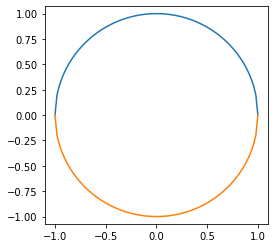

In [140]:
# 使用scipy.integrate进行积分，调用quad()方法
#定义圆函数
f = lambda x: (1 - x**2)**0.5
#对积分区间切分
x = np.linspace(-1, 1, 100)
y = f(x)
#定义图像大小
plt.figure(figsize=(4, 4))
#使图像横轴纵轴比例一致
plt.axis("equal")
#指定x、y的值域区间
plt.plot(x, y)
plt.plot(x, -y)
# 求不规则图形的面积
from scipy.integrate import quad
area, err = quad(f, -1, 1)  #得到面积和误差
area
err
# (1.5707963267948986, 1.0002356720661965e-09)
#用s/r^2得到圆周率
area * 2 / 1**2  #3.141592653589797

In [139]:
from scipy.integrate import quad
# Defining function to integrate
func = lambda x: np.cos(np.exp(x)) ** 2
# Integrating function with upper and lower
# limits of 0 and 3, respectively
solution = quad(func, 0, 3)
solution
# The first element is the desired value
# and the second is the error.
# (1.296467785724373, 1.397797186265988e-09)

(1.296467785724373, 1.397797133112089e-09)

In [141]:
from scipy.integrate import quad, trapz
# Setting up fake data
x = np.sort(np.random.randn(150)*4+ 4).clip(0,5)
func = lambda x: np.sin(x) * np.cos(x ** 2) + 1
y = func(x)
# Integrating function with upper and lower
# limits of 0 and 5, respectively
fsolution = quad(func, 0, 5)
dsolution = trapz(y, x=x)
print('fsolution='+ str(fsolution[0]))
print('dsolution='+ str(dsolution))
print('The difference is ' + str(np.abs(fsolution[0] - dsolution)))
# fsolution = 5.10034506754
# dsolution = 5.04201628314
# The difference is 0.0583287843989.

fsolution=5.100345067540932
dsolution=4.962299674798563
The difference is 0.13804539274236927


# 统计

## 连续和离散分布

PDF，是概率密度函数，描述可能性的变化情况，如正态分布密度函数，在中间出现的情况最大，两端出现的情况较小。  
CDF,是分布函数，描述发生某事件概率。任何一个CDF，是一个不减函数，最终等于1.上面的pdf描述了CDF的变化趋势，即曲线的斜率。

PDF：概率密度函数（probability density function）, 在数学中，连续型随机变量的概率密度函数（在不至于混淆时可以简称为密度函数）是一个描述这个随机变量的输出值，在某个确定的取值点附近的可能性的函数。

PMF : 概率质量函数（probability mass function), 在概率论中，概率质量函数是离散随机变量在各特定取值上的概率。

CDF : 累积分布函数 (cumulative distribution function)，又叫分布函数，是概率密度函数的积分，能完整描述一个实随机变量X的概率分布。
***
PDF：如果XX是连续型随机变量，定义概率密度函数为fX(x)fX(x)，用PDF在某一区间上的积分来刻画随机变量落在这个区间中的概率，即  
$$Pr(a\le X \le b) = \int_a^b f_X(x)dx)$$  
PMF：如果XX离散型随机变量，定义概率质量函数为fX(x)fX(x),PMF其实就是高中所学的离散型随机变量的分布律,即  
$$f_X(x)=Pr(X=x)$$  
比如对于掷一枚均匀硬币，如果正面令X=1，如果反面令X=0，那么它的PMF就是    
$$ f_X(x)=\begin{cases}\frac{1}{2}\quad if \quad x \in\{0,1\}\\0 \quad if \quad x \notin\{0,1\}\end{cases} $$  
CDF：不管是什么类型（连续/离散/其他）的随机变量，都可以定义它的累积分布函数，有时简称为分布函数。    
对于连续型随机变量，显然有$F_X(x)=Pr(X\le x)=\int_{-\infty}^x f_X(t)dt$那么CDF就是PDF的积分，PDF就是CDF的导数。  
对于离散型随机变量，其CDF是分段函数，比如举例中的掷硬币随机变量，它的CDF为  
$$F_X(x)=Pr(X\le x)=\begin{cases} 0 \quad if \quad x\lt 0 \\ \frac{1}{2} \quad if \quad 0\le x \lt 1 \\ 1 \quad if \quad x \ge 1 \end{cases}$$



[stats](https://docs.scipy.org/doc/scipy-0.19.1/reference/stats.html)

### Statistical functions (scipy.stats)  
<table border="1" class="longtable docutils">
<colgroup>
<col width="10%">
<col width="90%">
</colgroup>
<tbody valign="top">
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous" title="scipy.stats.rv_continuous"><code class="xref py py-obj docutils literal"><span class="pre">rv_continuous</span></code></a>([momtype,&nbsp;a,&nbsp;b,&nbsp;xtol,&nbsp;...])</td>
<td>A generic continuous random variable class meant for subclassing.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.rv_discrete.html#scipy.stats.rv_discrete" title="scipy.stats.rv_discrete"><code class="xref py py-obj docutils literal"><span class="pre">rv_discrete</span></code></a>([a,&nbsp;b,&nbsp;name,&nbsp;badvalue,&nbsp;...])</td>
<td>A generic discrete random variable class meant for subclassing.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.rv_histogram.html#scipy.stats.rv_histogram" title="scipy.stats.rv_histogram"><code class="xref py py-obj docutils literal"><span class="pre">rv_histogram</span></code></a>(histogram,&nbsp;*args,&nbsp;**kwargs)</td>
<td>Generates a distribution given by a histogram.</td>
</tr>
</tbody>
</table>

Continuous distributions  
<table border="1" class="longtable docutils">
<colgroup>
<col width="10%">
<col width="90%">
</colgroup>
<tbody valign="top">
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.alpha.html#scipy.stats.alpha" title="scipy.stats.alpha"><code class="xref py py-obj docutils literal"><span class="pre">alpha</span></code></a></td>
<td>An alpha continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.anglit.html#scipy.stats.anglit" title="scipy.stats.anglit"><code class="xref py py-obj docutils literal"><span class="pre">anglit</span></code></a></td>
<td>An anglit continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.arcsine.html#scipy.stats.arcsine" title="scipy.stats.arcsine"><code class="xref py py-obj docutils literal"><span class="pre">arcsine</span></code></a></td>
<td>An arcsine continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.argus.html#scipy.stats.argus" title="scipy.stats.argus"><code class="xref py py-obj docutils literal"><span class="pre">argus</span></code></a></td>
<td>Argus distribution</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.beta.html#scipy.stats.beta" title="scipy.stats.beta"><code class="xref py py-obj docutils literal"><span class="pre">beta</span></code></a></td>
<td>A beta continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.betaprime.html#scipy.stats.betaprime" title="scipy.stats.betaprime"><code class="xref py py-obj docutils literal"><span class="pre">betaprime</span></code></a></td>
<td>A beta prime continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.bradford.html#scipy.stats.bradford" title="scipy.stats.bradford"><code class="xref py py-obj docutils literal"><span class="pre">bradford</span></code></a></td>
<td>A Bradford continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.burr.html#scipy.stats.burr" title="scipy.stats.burr"><code class="xref py py-obj docutils literal"><span class="pre">burr</span></code></a></td>
<td>A Burr (Type III) continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.burr12.html#scipy.stats.burr12" title="scipy.stats.burr12"><code class="xref py py-obj docutils literal"><span class="pre">burr12</span></code></a></td>
<td>A Burr (Type XII) continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.cauchy.html#scipy.stats.cauchy" title="scipy.stats.cauchy"><code class="xref py py-obj docutils literal"><span class="pre">cauchy</span></code></a></td>
<td>A Cauchy continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.chi.html#scipy.stats.chi" title="scipy.stats.chi"><code class="xref py py-obj docutils literal"><span class="pre">chi</span></code></a></td>
<td>A chi continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.chi2.html#scipy.stats.chi2" title="scipy.stats.chi2"><code class="xref py py-obj docutils literal"><span class="pre">chi2</span></code></a></td>
<td>A chi-squared continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.cosine.html#scipy.stats.cosine" title="scipy.stats.cosine"><code class="xref py py-obj docutils literal"><span class="pre">cosine</span></code></a></td>
<td>A cosine continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.dgamma.html#scipy.stats.dgamma" title="scipy.stats.dgamma"><code class="xref py py-obj docutils literal"><span class="pre">dgamma</span></code></a></td>
<td>A double gamma continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.dweibull.html#scipy.stats.dweibull" title="scipy.stats.dweibull"><code class="xref py py-obj docutils literal"><span class="pre">dweibull</span></code></a></td>
<td>A double Weibull continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.erlang.html#scipy.stats.erlang" title="scipy.stats.erlang"><code class="xref py py-obj docutils literal"><span class="pre">erlang</span></code></a></td>
<td>An Erlang continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.expon.html#scipy.stats.expon" title="scipy.stats.expon"><code class="xref py py-obj docutils literal"><span class="pre">expon</span></code></a></td>
<td>An exponential continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.exponnorm.html#scipy.stats.exponnorm" title="scipy.stats.exponnorm"><code class="xref py py-obj docutils literal"><span class="pre">exponnorm</span></code></a></td>
<td>An exponentially modified Normal continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.exponweib.html#scipy.stats.exponweib" title="scipy.stats.exponweib"><code class="xref py py-obj docutils literal"><span class="pre">exponweib</span></code></a></td>
<td>An exponentiated Weibull continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.exponpow.html#scipy.stats.exponpow" title="scipy.stats.exponpow"><code class="xref py py-obj docutils literal"><span class="pre">exponpow</span></code></a></td>
<td>An exponential power continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.f.html#scipy.stats.f" title="scipy.stats.f"><code class="xref py py-obj docutils literal"><span class="pre">f</span></code></a></td>
<td>An F continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.fatiguelife.html#scipy.stats.fatiguelife" title="scipy.stats.fatiguelife"><code class="xref py py-obj docutils literal"><span class="pre">fatiguelife</span></code></a></td>
<td>A fatigue-life (Birnbaum-Saunders) continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.fisk.html#scipy.stats.fisk" title="scipy.stats.fisk"><code class="xref py py-obj docutils literal"><span class="pre">fisk</span></code></a></td>
<td>A Fisk continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.foldcauchy.html#scipy.stats.foldcauchy" title="scipy.stats.foldcauchy"><code class="xref py py-obj docutils literal"><span class="pre">foldcauchy</span></code></a></td>
<td>A folded Cauchy continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.foldnorm.html#scipy.stats.foldnorm" title="scipy.stats.foldnorm"><code class="xref py py-obj docutils literal"><span class="pre">foldnorm</span></code></a></td>
<td>A folded normal continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.frechet_r.html#scipy.stats.frechet_r" title="scipy.stats.frechet_r"><code class="xref py py-obj docutils literal"><span class="pre">frechet_r</span></code></a></td>
<td>A Frechet right (or Weibull minimum) continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.frechet_l.html#scipy.stats.frechet_l" title="scipy.stats.frechet_l"><code class="xref py py-obj docutils literal"><span class="pre">frechet_l</span></code></a></td>
<td>A Frechet left (or Weibull maximum) continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.genlogistic.html#scipy.stats.genlogistic" title="scipy.stats.genlogistic"><code class="xref py py-obj docutils literal"><span class="pre">genlogistic</span></code></a></td>
<td>A generalized logistic continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.gennorm.html#scipy.stats.gennorm" title="scipy.stats.gennorm"><code class="xref py py-obj docutils literal"><span class="pre">gennorm</span></code></a></td>
<td>A generalized normal continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.genpareto.html#scipy.stats.genpareto" title="scipy.stats.genpareto"><code class="xref py py-obj docutils literal"><span class="pre">genpareto</span></code></a></td>
<td>A generalized Pareto continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.genexpon.html#scipy.stats.genexpon" title="scipy.stats.genexpon"><code class="xref py py-obj docutils literal"><span class="pre">genexpon</span></code></a></td>
<td>A generalized exponential continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.genextreme.html#scipy.stats.genextreme" title="scipy.stats.genextreme"><code class="xref py py-obj docutils literal"><span class="pre">genextreme</span></code></a></td>
<td>A generalized extreme value continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.gausshyper.html#scipy.stats.gausshyper" title="scipy.stats.gausshyper"><code class="xref py py-obj docutils literal"><span class="pre">gausshyper</span></code></a></td>
<td>A Gauss hypergeometric continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.gamma.html#scipy.stats.gamma" title="scipy.stats.gamma"><code class="xref py py-obj docutils literal"><span class="pre">gamma</span></code></a></td>
<td>A gamma continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.gengamma.html#scipy.stats.gengamma" title="scipy.stats.gengamma"><code class="xref py py-obj docutils literal"><span class="pre">gengamma</span></code></a></td>
<td>A generalized gamma continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.genhalflogistic.html#scipy.stats.genhalflogistic" title="scipy.stats.genhalflogistic"><code class="xref py py-obj docutils literal"><span class="pre">genhalflogistic</span></code></a></td>
<td>A generalized half-logistic continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.gilbrat.html#scipy.stats.gilbrat" title="scipy.stats.gilbrat"><code class="xref py py-obj docutils literal"><span class="pre">gilbrat</span></code></a></td>
<td>A Gilbrat continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.gompertz.html#scipy.stats.gompertz" title="scipy.stats.gompertz"><code class="xref py py-obj docutils literal"><span class="pre">gompertz</span></code></a></td>
<td>A Gompertz (or truncated Gumbel) continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.gumbel_r.html#scipy.stats.gumbel_r" title="scipy.stats.gumbel_r"><code class="xref py py-obj docutils literal"><span class="pre">gumbel_r</span></code></a></td>
<td>A right-skewed Gumbel continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.gumbel_l.html#scipy.stats.gumbel_l" title="scipy.stats.gumbel_l"><code class="xref py py-obj docutils literal"><span class="pre">gumbel_l</span></code></a></td>
<td>A left-skewed Gumbel continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.halfcauchy.html#scipy.stats.halfcauchy" title="scipy.stats.halfcauchy"><code class="xref py py-obj docutils literal"><span class="pre">halfcauchy</span></code></a></td>
<td>A Half-Cauchy continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.halflogistic.html#scipy.stats.halflogistic" title="scipy.stats.halflogistic"><code class="xref py py-obj docutils literal"><span class="pre">halflogistic</span></code></a></td>
<td>A half-logistic continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.halfnorm.html#scipy.stats.halfnorm" title="scipy.stats.halfnorm"><code class="xref py py-obj docutils literal"><span class="pre">halfnorm</span></code></a></td>
<td>A half-normal continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.halfgennorm.html#scipy.stats.halfgennorm" title="scipy.stats.halfgennorm"><code class="xref py py-obj docutils literal"><span class="pre">halfgennorm</span></code></a></td>
<td>The upper half of a generalized normal continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.hypsecant.html#scipy.stats.hypsecant" title="scipy.stats.hypsecant"><code class="xref py py-obj docutils literal"><span class="pre">hypsecant</span></code></a></td>
<td>A hyperbolic secant continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.invgamma.html#scipy.stats.invgamma" title="scipy.stats.invgamma"><code class="xref py py-obj docutils literal"><span class="pre">invgamma</span></code></a></td>
<td>An inverted gamma continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.invgauss.html#scipy.stats.invgauss" title="scipy.stats.invgauss"><code class="xref py py-obj docutils literal"><span class="pre">invgauss</span></code></a></td>
<td>An inverse Gaussian continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.invweibull.html#scipy.stats.invweibull" title="scipy.stats.invweibull"><code class="xref py py-obj docutils literal"><span class="pre">invweibull</span></code></a></td>
<td>An inverted Weibull continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.johnsonsb.html#scipy.stats.johnsonsb" title="scipy.stats.johnsonsb"><code class="xref py py-obj docutils literal"><span class="pre">johnsonsb</span></code></a></td>
<td>A Johnson SB continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.johnsonsu.html#scipy.stats.johnsonsu" title="scipy.stats.johnsonsu"><code class="xref py py-obj docutils literal"><span class="pre">johnsonsu</span></code></a></td>
<td>A Johnson SU continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.kappa4.html#scipy.stats.kappa4" title="scipy.stats.kappa4"><code class="xref py py-obj docutils literal"><span class="pre">kappa4</span></code></a></td>
<td>Kappa 4 parameter distribution.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.kappa3.html#scipy.stats.kappa3" title="scipy.stats.kappa3"><code class="xref py py-obj docutils literal"><span class="pre">kappa3</span></code></a></td>
<td>Kappa 3 parameter distribution.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.ksone.html#scipy.stats.ksone" title="scipy.stats.ksone"><code class="xref py py-obj docutils literal"><span class="pre">ksone</span></code></a></td>
<td>General Kolmogorov-Smirnov one-sided test.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.kstwobign.html#scipy.stats.kstwobign" title="scipy.stats.kstwobign"><code class="xref py py-obj docutils literal"><span class="pre">kstwobign</span></code></a></td>
<td>Kolmogorov-Smirnov two-sided test for large N.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.laplace.html#scipy.stats.laplace" title="scipy.stats.laplace"><code class="xref py py-obj docutils literal"><span class="pre">laplace</span></code></a></td>
<td>A Laplace continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.levy.html#scipy.stats.levy" title="scipy.stats.levy"><code class="xref py py-obj docutils literal"><span class="pre">levy</span></code></a></td>
<td>A Levy continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.levy_l.html#scipy.stats.levy_l" title="scipy.stats.levy_l"><code class="xref py py-obj docutils literal"><span class="pre">levy_l</span></code></a></td>
<td>A left-skewed Levy continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.levy_stable.html#scipy.stats.levy_stable" title="scipy.stats.levy_stable"><code class="xref py py-obj docutils literal"><span class="pre">levy_stable</span></code></a></td>
<td>A Levy-stable continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.logistic.html#scipy.stats.logistic" title="scipy.stats.logistic"><code class="xref py py-obj docutils literal"><span class="pre">logistic</span></code></a></td>
<td>A logistic (or Sech-squared) continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.loggamma.html#scipy.stats.loggamma" title="scipy.stats.loggamma"><code class="xref py py-obj docutils literal"><span class="pre">loggamma</span></code></a></td>
<td>A log gamma continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.loglaplace.html#scipy.stats.loglaplace" title="scipy.stats.loglaplace"><code class="xref py py-obj docutils literal"><span class="pre">loglaplace</span></code></a></td>
<td>A log-Laplace continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.lognorm.html#scipy.stats.lognorm" title="scipy.stats.lognorm"><code class="xref py py-obj docutils literal"><span class="pre">lognorm</span></code></a></td>
<td>A lognormal continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.lomax.html#scipy.stats.lomax" title="scipy.stats.lomax"><code class="xref py py-obj docutils literal"><span class="pre">lomax</span></code></a></td>
<td>A Lomax (Pareto of the second kind) continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.maxwell.html#scipy.stats.maxwell" title="scipy.stats.maxwell"><code class="xref py py-obj docutils literal"><span class="pre">maxwell</span></code></a></td>
<td>A Maxwell continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.mielke.html#scipy.stats.mielke" title="scipy.stats.mielke"><code class="xref py py-obj docutils literal"><span class="pre">mielke</span></code></a></td>
<td>A Mielke’s Beta-Kappa continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.nakagami.html#scipy.stats.nakagami" title="scipy.stats.nakagami"><code class="xref py py-obj docutils literal"><span class="pre">nakagami</span></code></a></td>
<td>A Nakagami continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.ncx2.html#scipy.stats.ncx2" title="scipy.stats.ncx2"><code class="xref py py-obj docutils literal"><span class="pre">ncx2</span></code></a></td>
<td>A non-central chi-squared continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.ncf.html#scipy.stats.ncf" title="scipy.stats.ncf"><code class="xref py py-obj docutils literal"><span class="pre">ncf</span></code></a></td>
<td>A non-central F distribution continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.nct.html#scipy.stats.nct" title="scipy.stats.nct"><code class="xref py py-obj docutils literal"><span class="pre">nct</span></code></a></td>
<td>A non-central Student’s T continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.norm.html#scipy.stats.norm" title="scipy.stats.norm"><code class="xref py py-obj docutils literal"><span class="pre">norm</span></code></a></td>
<td>A normal continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.pareto.html#scipy.stats.pareto" title="scipy.stats.pareto"><code class="xref py py-obj docutils literal"><span class="pre">pareto</span></code></a></td>
<td>A Pareto continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.pearson3.html#scipy.stats.pearson3" title="scipy.stats.pearson3"><code class="xref py py-obj docutils literal"><span class="pre">pearson3</span></code></a></td>
<td>A pearson type III continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.powerlaw.html#scipy.stats.powerlaw" title="scipy.stats.powerlaw"><code class="xref py py-obj docutils literal"><span class="pre">powerlaw</span></code></a></td>
<td>A power-function continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.powerlognorm.html#scipy.stats.powerlognorm" title="scipy.stats.powerlognorm"><code class="xref py py-obj docutils literal"><span class="pre">powerlognorm</span></code></a></td>
<td>A power log-normal continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.powernorm.html#scipy.stats.powernorm" title="scipy.stats.powernorm"><code class="xref py py-obj docutils literal"><span class="pre">powernorm</span></code></a></td>
<td>A power normal continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.rdist.html#scipy.stats.rdist" title="scipy.stats.rdist"><code class="xref py py-obj docutils literal"><span class="pre">rdist</span></code></a></td>
<td>An R-distributed continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.reciprocal.html#scipy.stats.reciprocal" title="scipy.stats.reciprocal"><code class="xref py py-obj docutils literal"><span class="pre">reciprocal</span></code></a></td>
<td>A reciprocal continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.rayleigh.html#scipy.stats.rayleigh" title="scipy.stats.rayleigh"><code class="xref py py-obj docutils literal"><span class="pre">rayleigh</span></code></a></td>
<td>A Rayleigh continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.rice.html#scipy.stats.rice" title="scipy.stats.rice"><code class="xref py py-obj docutils literal"><span class="pre">rice</span></code></a></td>
<td>A Rice continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.recipinvgauss.html#scipy.stats.recipinvgauss" title="scipy.stats.recipinvgauss"><code class="xref py py-obj docutils literal"><span class="pre">recipinvgauss</span></code></a></td>
<td>A reciprocal inverse Gaussian continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.semicircular.html#scipy.stats.semicircular" title="scipy.stats.semicircular"><code class="xref py py-obj docutils literal"><span class="pre">semicircular</span></code></a></td>
<td>A semicircular continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.skewnorm.html#scipy.stats.skewnorm" title="scipy.stats.skewnorm"><code class="xref py py-obj docutils literal"><span class="pre">skewnorm</span></code></a></td>
<td>A skew-normal random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.t.html#scipy.stats.t" title="scipy.stats.t"><code class="xref py py-obj docutils literal"><span class="pre">t</span></code></a></td>
<td>A Student’s T continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.trapz.html#scipy.stats.trapz" title="scipy.stats.trapz"><code class="xref py py-obj docutils literal"><span class="pre">trapz</span></code></a></td>
<td>A trapezoidal continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.triang.html#scipy.stats.triang" title="scipy.stats.triang"><code class="xref py py-obj docutils literal"><span class="pre">triang</span></code></a></td>
<td>A triangular continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.truncexpon.html#scipy.stats.truncexpon" title="scipy.stats.truncexpon"><code class="xref py py-obj docutils literal"><span class="pre">truncexpon</span></code></a></td>
<td>A truncated exponential continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.truncnorm.html#scipy.stats.truncnorm" title="scipy.stats.truncnorm"><code class="xref py py-obj docutils literal"><span class="pre">truncnorm</span></code></a></td>
<td>A truncated normal continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.tukeylambda.html#scipy.stats.tukeylambda" title="scipy.stats.tukeylambda"><code class="xref py py-obj docutils literal"><span class="pre">tukeylambda</span></code></a></td>
<td>A Tukey-Lamdba continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.uniform.html#scipy.stats.uniform" title="scipy.stats.uniform"><code class="xref py py-obj docutils literal"><span class="pre">uniform</span></code></a></td>
<td>A uniform continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.vonmises.html#scipy.stats.vonmises" title="scipy.stats.vonmises"><code class="xref py py-obj docutils literal"><span class="pre">vonmises</span></code></a></td>
<td>A Von Mises continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.vonmises_line.html#scipy.stats.vonmises_line" title="scipy.stats.vonmises_line"><code class="xref py py-obj docutils literal"><span class="pre">vonmises_line</span></code></a></td>
<td>A Von Mises continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.wald.html#scipy.stats.wald" title="scipy.stats.wald"><code class="xref py py-obj docutils literal"><span class="pre">wald</span></code></a></td>
<td>A Wald continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.weibull_min.html#scipy.stats.weibull_min" title="scipy.stats.weibull_min"><code class="xref py py-obj docutils literal"><span class="pre">weibull_min</span></code></a></td>
<td>A Frechet right (or Weibull minimum) continuous random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.weibull_max.html#scipy.stats.weibull_max" title="scipy.stats.weibull_max"><code class="xref py py-obj docutils literal"><span class="pre">weibull_max</span></code></a></td>
<td>A Frechet left (or Weibull maximum) continuous random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.wrapcauchy.html#scipy.stats.wrapcauchy" title="scipy.stats.wrapcauchy"><code class="xref py py-obj docutils literal"><span class="pre">wrapcauchy</span></code></a></td>
<td>A wrapped Cauchy continuous random variable.</td>
</tr>
</tbody>
</table>


#### Multivariate distributions  
<table border="1" class="longtable docutils">
<colgroup>
<col width="10%">
<col width="90%">
</colgroup>
<tbody valign="top">
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.multivariate_normal.html#scipy.stats.multivariate_normal" title="scipy.stats.multivariate_normal"><code class="xref py py-obj docutils literal"><span class="pre">multivariate_normal</span></code></a></td>
<td>A multivariate normal random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.matrix_normal.html#scipy.stats.matrix_normal" title="scipy.stats.matrix_normal"><code class="xref py py-obj docutils literal"><span class="pre">matrix_normal</span></code></a></td>
<td>A matrix normal random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.dirichlet.html#scipy.stats.dirichlet" title="scipy.stats.dirichlet"><code class="xref py py-obj docutils literal"><span class="pre">dirichlet</span></code></a></td>
<td>A Dirichlet random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.wishart.html#scipy.stats.wishart" title="scipy.stats.wishart"><code class="xref py py-obj docutils literal"><span class="pre">wishart</span></code></a></td>
<td>A Wishart random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.invwishart.html#scipy.stats.invwishart" title="scipy.stats.invwishart"><code class="xref py py-obj docutils literal"><span class="pre">invwishart</span></code></a></td>
<td>An inverse Wishart random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.multinomial.html#scipy.stats.multinomial" title="scipy.stats.multinomial"><code class="xref py py-obj docutils literal"><span class="pre">multinomial</span></code></a></td>
<td>A multinomial random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.special_ortho_group.html#scipy.stats.special_ortho_group" title="scipy.stats.special_ortho_group"><code class="xref py py-obj docutils literal"><span class="pre">special_ortho_group</span></code></a></td>
<td>A matrix-valued SO(N) random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.ortho_group.html#scipy.stats.ortho_group" title="scipy.stats.ortho_group"><code class="xref py py-obj docutils literal"><span class="pre">ortho_group</span></code></a></td>
<td>A matrix-valued O(N) random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.random_correlation.html#scipy.stats.random_correlation" title="scipy.stats.random_correlation"><code class="xref py py-obj docutils literal"><span class="pre">random_correlation</span></code></a></td>
<td>A random correlation matrix.</td>
</tr>
</tbody>
</table>

#### Discrete distributions  
<table border="1" class="longtable docutils">
<colgroup>
<col width="10%">
<col width="90%">
</colgroup>
<tbody valign="top">
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.bernoulli.html#scipy.stats.bernoulli" title="scipy.stats.bernoulli"><code class="xref py py-obj docutils literal"><span class="pre">bernoulli</span></code></a></td>
<td>A Bernoulli discrete random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.binom.html#scipy.stats.binom" title="scipy.stats.binom"><code class="xref py py-obj docutils literal"><span class="pre">binom</span></code></a></td>
<td>A binomial discrete random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.boltzmann.html#scipy.stats.boltzmann" title="scipy.stats.boltzmann"><code class="xref py py-obj docutils literal"><span class="pre">boltzmann</span></code></a></td>
<td>A Boltzmann (Truncated Discrete Exponential) random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.dlaplace.html#scipy.stats.dlaplace" title="scipy.stats.dlaplace"><code class="xref py py-obj docutils literal"><span class="pre">dlaplace</span></code></a></td>
<td>A  Laplacian discrete random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.geom.html#scipy.stats.geom" title="scipy.stats.geom"><code class="xref py py-obj docutils literal"><span class="pre">geom</span></code></a></td>
<td>A geometric discrete random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.hypergeom.html#scipy.stats.hypergeom" title="scipy.stats.hypergeom"><code class="xref py py-obj docutils literal"><span class="pre">hypergeom</span></code></a></td>
<td>A hypergeometric discrete random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.logser.html#scipy.stats.logser" title="scipy.stats.logser"><code class="xref py py-obj docutils literal"><span class="pre">logser</span></code></a></td>
<td>A Logarithmic (Log-Series, Series) discrete random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.nbinom.html#scipy.stats.nbinom" title="scipy.stats.nbinom"><code class="xref py py-obj docutils literal"><span class="pre">nbinom</span></code></a></td>
<td>A negative binomial discrete random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.planck.html#scipy.stats.planck" title="scipy.stats.planck"><code class="xref py py-obj docutils literal"><span class="pre">planck</span></code></a></td>
<td>A Planck discrete exponential random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.poisson.html#scipy.stats.poisson" title="scipy.stats.poisson"><code class="xref py py-obj docutils literal"><span class="pre">poisson</span></code></a></td>
<td>A Poisson discrete random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.randint.html#scipy.stats.randint" title="scipy.stats.randint"><code class="xref py py-obj docutils literal"><span class="pre">randint</span></code></a></td>
<td>A uniform discrete random variable.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.skellam.html#scipy.stats.skellam" title="scipy.stats.skellam"><code class="xref py py-obj docutils literal"><span class="pre">skellam</span></code></a></td>
<td>A  Skellam discrete random variable.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.zipf.html#scipy.stats.zipf" title="scipy.stats.zipf"><code class="xref py py-obj docutils literal"><span class="pre">zipf</span></code></a></td>
<td>A Zipf discrete random variable.</td>
</tr>
</tbody>
</table>

#### Statistical functions  
<table border="1" class="longtable docutils">
<colgroup>
<col width="10%">
<col width="90%">
</colgroup>
<tbody valign="top">
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.describe.html#scipy.stats.describe" title="scipy.stats.describe"><code class="xref py py-obj docutils literal"><span class="pre">describe</span></code></a>(a[,&nbsp;axis,&nbsp;ddof,&nbsp;bias,&nbsp;nan_policy])</td>
<td>Computes several descriptive statistics of the passed array.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.gmean.html#scipy.stats.gmean" title="scipy.stats.gmean"><code class="xref py py-obj docutils literal"><span class="pre">gmean</span></code></a>(a[,&nbsp;axis,&nbsp;dtype])</td>
<td>Compute the geometric mean along the specified axis.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.hmean.html#scipy.stats.hmean" title="scipy.stats.hmean"><code class="xref py py-obj docutils literal"><span class="pre">hmean</span></code></a>(a[,&nbsp;axis,&nbsp;dtype])</td>
<td>Calculates the harmonic mean along the specified axis.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.kurtosis.html#scipy.stats.kurtosis" title="scipy.stats.kurtosis"><code class="xref py py-obj docutils literal"><span class="pre">kurtosis</span></code></a>(a[,&nbsp;axis,&nbsp;fisher,&nbsp;bias,&nbsp;nan_policy])</td>
<td>Computes the kurtosis (Fisher or Pearson) of a dataset.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.kurtosistest.html#scipy.stats.kurtosistest" title="scipy.stats.kurtosistest"><code class="xref py py-obj docutils literal"><span class="pre">kurtosistest</span></code></a>(a[,&nbsp;axis,&nbsp;nan_policy])</td>
<td>Tests whether a dataset has normal kurtosis</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.mode.html#scipy.stats.mode" title="scipy.stats.mode"><code class="xref py py-obj docutils literal"><span class="pre">mode</span></code></a>(a[,&nbsp;axis,&nbsp;nan_policy])</td>
<td>Returns an array of the modal (most common) value in the passed array.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.moment.html#scipy.stats.moment" title="scipy.stats.moment"><code class="xref py py-obj docutils literal"><span class="pre">moment</span></code></a>(a[,&nbsp;moment,&nbsp;axis,&nbsp;nan_policy])</td>
<td>Calculates the nth moment about the mean for a sample.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.normaltest.html#scipy.stats.normaltest" title="scipy.stats.normaltest"><code class="xref py py-obj docutils literal"><span class="pre">normaltest</span></code></a>(a[,&nbsp;axis,&nbsp;nan_policy])</td>
<td>Tests whether a sample differs from a normal distribution.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.skew.html#scipy.stats.skew" title="scipy.stats.skew"><code class="xref py py-obj docutils literal"><span class="pre">skew</span></code></a>(a[,&nbsp;axis,&nbsp;bias,&nbsp;nan_policy])</td>
<td>Computes the skewness of a data set.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.skewtest.html#scipy.stats.skewtest" title="scipy.stats.skewtest"><code class="xref py py-obj docutils literal"><span class="pre">skewtest</span></code></a>(a[,&nbsp;axis,&nbsp;nan_policy])</td>
<td>Tests whether the skew is different from the normal distribution.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.kstat.html#scipy.stats.kstat" title="scipy.stats.kstat"><code class="xref py py-obj docutils literal"><span class="pre">kstat</span></code></a>(data[,&nbsp;n])</td>
<td>Return the nth k-statistic (1&lt;=n&lt;=4 so far).</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.kstatvar.html#scipy.stats.kstatvar" title="scipy.stats.kstatvar"><code class="xref py py-obj docutils literal"><span class="pre">kstatvar</span></code></a>(data[,&nbsp;n])</td>
<td>Returns an unbiased estimator of the variance of the k-statistic.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.tmean.html#scipy.stats.tmean" title="scipy.stats.tmean"><code class="xref py py-obj docutils literal"><span class="pre">tmean</span></code></a>(a[,&nbsp;limits,&nbsp;inclusive,&nbsp;axis])</td>
<td>Compute the trimmed mean.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.tvar.html#scipy.stats.tvar" title="scipy.stats.tvar"><code class="xref py py-obj docutils literal"><span class="pre">tvar</span></code></a>(a[,&nbsp;limits,&nbsp;inclusive,&nbsp;axis,&nbsp;ddof])</td>
<td>Compute the trimmed variance</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.tmin.html#scipy.stats.tmin" title="scipy.stats.tmin"><code class="xref py py-obj docutils literal"><span class="pre">tmin</span></code></a>(a[,&nbsp;lowerlimit,&nbsp;axis,&nbsp;inclusive,&nbsp;...])</td>
<td>Compute the trimmed minimum</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.tmax.html#scipy.stats.tmax" title="scipy.stats.tmax"><code class="xref py py-obj docutils literal"><span class="pre">tmax</span></code></a>(a[,&nbsp;upperlimit,&nbsp;axis,&nbsp;inclusive,&nbsp;...])</td>
<td>Compute the trimmed maximum</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.tstd.html#scipy.stats.tstd" title="scipy.stats.tstd"><code class="xref py py-obj docutils literal"><span class="pre">tstd</span></code></a>(a[,&nbsp;limits,&nbsp;inclusive,&nbsp;axis,&nbsp;ddof])</td>
<td>Compute the trimmed sample standard deviation</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.tsem.html#scipy.stats.tsem" title="scipy.stats.tsem"><code class="xref py py-obj docutils literal"><span class="pre">tsem</span></code></a>(a[,&nbsp;limits,&nbsp;inclusive,&nbsp;axis,&nbsp;ddof])</td>
<td>Compute the trimmed standard error of the mean.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.variation.html#scipy.stats.variation" title="scipy.stats.variation"><code class="xref py py-obj docutils literal"><span class="pre">variation</span></code></a>(a[,&nbsp;axis,&nbsp;nan_policy])</td>
<td>Computes the coefficient of variation, the ratio of the biased standard deviation to the mean.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.find_repeats.html#scipy.stats.find_repeats" title="scipy.stats.find_repeats"><code class="xref py py-obj docutils literal"><span class="pre">find_repeats</span></code></a>(arr)</td>
<td>Find repeats and repeat counts.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.trim_mean.html#scipy.stats.trim_mean" title="scipy.stats.trim_mean"><code class="xref py py-obj docutils literal"><span class="pre">trim_mean</span></code></a>(a,&nbsp;proportiontocut[,&nbsp;axis])</td>
<td>Return mean of array after trimming distribution from both tails.</td>
</tr>
</tbody>
</table>

#### Circular statistical functions  
<table border="1" class="longtable docutils">
<colgroup>
<col width="10%">
<col width="90%">
</colgroup>
<tbody valign="top">
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.circmean.html#scipy.stats.circmean" title="scipy.stats.circmean"><code class="xref py py-obj docutils literal"><span class="pre">circmean</span></code></a>(samples[,&nbsp;high,&nbsp;low,&nbsp;axis])</td>
<td>Compute the circular mean for samples in a range.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.circvar.html#scipy.stats.circvar" title="scipy.stats.circvar"><code class="xref py py-obj docutils literal"><span class="pre">circvar</span></code></a>(samples[,&nbsp;high,&nbsp;low,&nbsp;axis])</td>
<td>Compute the circular variance for samples assumed to be in a range</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.circstd.html#scipy.stats.circstd" title="scipy.stats.circstd"><code class="xref py py-obj docutils literal"><span class="pre">circstd</span></code></a>(samples[,&nbsp;high,&nbsp;low,&nbsp;axis])</td>
<td>Compute the circular standard deviation for samples assumed to be in the range [low to high].</td>
</tr>
</tbody>
</table>

#### Contingency table functions  
<table border="1" class="longtable docutils">
<colgroup>
<col width="10%">
<col width="90%">
</colgroup>
<tbody valign="top">
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.chi2_contingency.html#scipy.stats.chi2_contingency" title="scipy.stats.chi2_contingency"><code class="xref py py-obj docutils literal"><span class="pre">chi2_contingency</span></code></a>(observed[,&nbsp;correction,&nbsp;lambda_])</td>
<td>Chi-square test of independence of variables in a contingency table.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.contingency.expected_freq.html#scipy.stats.contingency.expected_freq" title="scipy.stats.contingency.expected_freq"><code class="xref py py-obj docutils literal"><span class="pre">contingency.expected_freq</span></code></a>(observed)</td>
<td>Compute the expected frequencies from a contingency table.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.contingency.margins.html#scipy.stats.contingency.margins" title="scipy.stats.contingency.margins"><code class="xref py py-obj docutils literal"><span class="pre">contingency.margins</span></code></a>(a)</td>
<td>Return a list of the marginal sums of the array <em class="xref py py-obj">a</em>.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.fisher_exact.html#scipy.stats.fisher_exact" title="scipy.stats.fisher_exact"><code class="xref py py-obj docutils literal"><span class="pre">fisher_exact</span></code></a>(table[,&nbsp;alternative])</td>
<td>Performs a Fisher exact test on a 2x2 contingency table.</td>
</tr>
</tbody>
</table>

#### Plot-tests  
<table border="1" class="longtable docutils">
<colgroup>
<col width="10%">
<col width="90%">
</colgroup>
<tbody valign="top">
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.ppcc_max.html#scipy.stats.ppcc_max" title="scipy.stats.ppcc_max"><code class="xref py py-obj docutils literal"><span class="pre">ppcc_max</span></code></a>(x[,&nbsp;brack,&nbsp;dist])</td>
<td>Calculate the shape parameter that maximizes the PPCC</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.ppcc_plot.html#scipy.stats.ppcc_plot" title="scipy.stats.ppcc_plot"><code class="xref py py-obj docutils literal"><span class="pre">ppcc_plot</span></code></a>(x,&nbsp;a,&nbsp;b[,&nbsp;dist,&nbsp;plot,&nbsp;N])</td>
<td>Calculate and optionally plot probability plot correlation coefficient.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="generated/scipy.stats.probplot.html#scipy.stats.probplot" title="scipy.stats.probplot"><code class="xref py py-obj docutils literal"><span class="pre">probplot</span></code></a>(x[,&nbsp;sparams,&nbsp;dist,&nbsp;fit,&nbsp;plot,&nbsp;rvalue])</td>
<td>Calculate quantiles for a probability plot, and optionally show the plot.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="generated/scipy.stats.boxcox_normplot.html#scipy.stats.boxcox_normplot" title="scipy.stats.boxcox_normplot"><code class="xref py py-obj docutils literal"><span class="pre">boxcox_normplot</span></code></a>(x,&nbsp;la,&nbsp;lb[,&nbsp;plot,&nbsp;N])</td>
<td>Compute parameters for a Box-Cox normality plot, optionally show it.</td>
</tr>
</tbody>
</table>

In [143]:
# Constructing a random array with 1000 elements
x = np.random.randn(1000)
# Calculating several of the built-in methods
# that numpy.array has
x.mean()
x.std()
x.var()

0.043382863557809744

1.0105763417132982

1.0212645424306328

### 生成随机数
* stats.norm  
    x=stats.norm.rvs(size=20) # 生成20个正态分布随机数  
* stats.uniform  
    y=stats.uniform.rvs(size=20) # 生成20个[0,1]均匀分布的随机数  
* stats.beta  
    z=stats.beta.rvs(size=20,a=3,b4) # 生成20个服从参数a=3,b=4的贝塔分布随机数  
* stats.poisson  
    r=stats.poisson.rvs(0.6,loc=0,size=20) # 生成20个服从泊松分布的随机数  
***
* commom distributions:  
uniform,norm,poisson,bernoulli,expon,lognorm, norm,t,chi2,f

* commom function:
    rvs产生服从制定分布的随机数  
    pdf概率密度函数  
    cdf累计分布函数  
    sf残存函数(1-cdf)  
    ppf分位点函数（CDF的逆函数）  
    isf逆残存函数  
    fit对随机取样进行你和，最大似然估计找到的概率密度函数系数 


产生随机数  
[ref](https://blog.csdn.net/baby_superman/article/details/83749803)

<p class="rubric">Methods</p>
<table border="1" class="docutils">
<colgroup>
<col width="45%">
<col width="55%">
</colgroup>
<tbody valign="top">
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">rvs(p,</span> <span class="pre">loc=0,</span> <span class="pre">size=1,</span> <span class="pre">random_state=None)</span></tt></td>
<td>Random variates.</td>
</tr>
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">pmf(x,</span> <span class="pre">p,</span> <span class="pre">loc=0)</span></tt></td>
<td>Probability mass function.</td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">logpmf(x,</span> <span class="pre">p,</span> <span class="pre">loc=0)</span></tt></td>
<td>Log of the probability mass function.</td>
</tr>
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">cdf(x,</span> <span class="pre">p,</span> <span class="pre">loc=0)</span></tt></td>
<td>Cumulative density function.</td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">logcdf(x,</span> <span class="pre">p,</span> <span class="pre">loc=0)</span></tt></td>
<td>Log of the cumulative density function.</td>
</tr>
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">sf(x,</span> <span class="pre">p,</span> <span class="pre">loc=0)</span></tt></td>
<td>Survival function  (also defined as <tt class="docutils literal"><span class="pre">1</span> <span class="pre">-</span> <span class="pre">cdf</span></tt>, but <em class="xref py py-obj">sf</em> is sometimes more accurate).</td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">logsf(x,</span> <span class="pre">p,</span> <span class="pre">loc=0)</span></tt></td>
<td>Log of the survival function.</td>
</tr>
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">ppf(q,</span> <span class="pre">p,</span> <span class="pre">loc=0)</span></tt></td>
<td>Percent point function (inverse of <tt class="docutils literal"><span class="pre">cdf</span></tt> — percentiles).</td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">isf(q,</span> <span class="pre">p,</span> <span class="pre">loc=0)</span></tt></td>
<td>Inverse survival function (inverse of <tt class="docutils literal"><span class="pre">sf</span></tt>).</td>
</tr>
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">stats(p,</span> <span class="pre">loc=0,</span> <span class="pre">moments='mv')</span></tt></td>
<td>Mean(‘m’), variance(‘v’), skew(‘s’), and/or kurtosis(‘k’).</td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">entropy(p,</span> <span class="pre">loc=0)</span></tt></td>
<td>(Differential) entropy of the RV.</td>
</tr>
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">expect(func,</span> <span class="pre">args=(p,),</span> <span class="pre">loc=0,</span> <span class="pre">lb=None,</span> <span class="pre">ub=None,</span> <span class="pre">conditional=False)</span></tt></td>
<td>Expected value of a function (of one argument) with respect to the distribution.</td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">median(p,</span> <span class="pre">loc=0)</span></tt></td>
<td>Median of the distribution.</td>
</tr>
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">mean(p,</span> <span class="pre">loc=0)</span></tt></td>
<td>Mean of the distribution.</td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">var(p,</span> <span class="pre">loc=0)</span></tt></td>
<td>Variance of the distribution.</td>
</tr>
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">std(p,</span> <span class="pre">loc=0)</span></tt></td>
<td>Standard deviation of the distribution.</td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">interval(alpha,</span> <span class="pre">p,</span> <span class="pre">loc=0)</span></tt></td>
<td>Endpoints of the range that contains alpha percent of the distribution</td>
</tr>
</tbody>
</table>

In [34]:
from scipy.stats import norm, uniform, beta
#1. random number
#np.random.normal(loc=0.0, scale=1.0, size=None)
rv_unif = uniform.rvs(size=10)
print(rv_unif)

rv_norm = norm.rvs(loc=5, scale=1, size=(2, 2))
print(rv_norm)

rv_beta = beta.rvs(size=10, a=4, b=2)
print(rv_beta)

[0.58 0.27 0.2  0.88 0.81 0.62 0.11 0.55 0.42 0.78]
[[5.87 5.46]
 [5.25 5.04]]
[0.65 0.48 0.39 0.6  0.28 0.84 0.53 0.43 0.8  0.99]


solve pdf（求概率密度函数）

In [36]:
x = norm.pdf(0, loc=0, scale=1)
y = norm.pdf(np.arange(3), loc=0, scale=1)
print(x)
print(y)

0.3989422804014327
[0.4  0.24 0.05]


solve cdf（求累计概率密度函数）

In [35]:
a = norm.cdf(0, loc=0, scale=1)
print(a)

x = norm.cdf(1.65, loc=0, scale=1)
y = norm.cdf(1.96, loc=0, scale=1)
z = norm.cdf(2.58, loc=0, scale=1)
print(x, y, z)

0.5
0.9505285319663519 0.9750021048517795 0.9950599842422293


solve ppf（求累计分布函数的逆函数，即分位点函数）  
* 分位函数  
    对于一个连续且单调的的分布函数，例如关于随机变量X的累计分布函数F，设有一概率p（0<=p<=1），分位函数Q返回阈值x使得$F_X(x):Pr(X\le x)=p$  
当分布函数F是连续函数时，更有$Q=F^{-1}$。  
* 分位数  
    分位数，也即分布函数中的分位点，是分位函数返回的值。

In [5]:
inv_z05 = norm.ppf(0.975)
print(inv_z05)

z05 = norm.cdf(inv_z05)
print(z05)

1.959963984540054
0.975


#### 正态分布

0.0

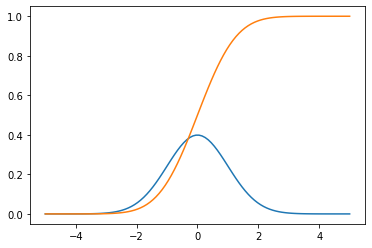

In [9]:
from scipy.stats import norm
# Set up the sample range
x = np.linspace(-5,5,100)
# Here set up the parameters for the normal distribution,
# where loc is the mean and scale is the standard deviation.
dist = norm(loc=0, scale=1) # loc均值，scale方差
# Retrieving norm's PDF and CDF
pdf = dist.pdf(x)
cdf = dist.cdf(x)
# pdf
# cdf
# Here we draw out 500 random values from the norm.
sample = dist.rvs(500)
# sample
plt.plot(x, pdf)
plt.plot(x, cdf)
dist.ppf(0.5)

#### 伯努利分布

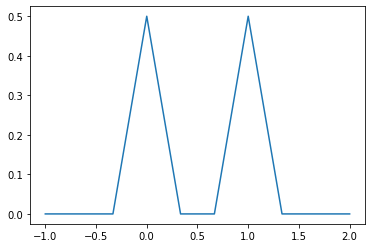

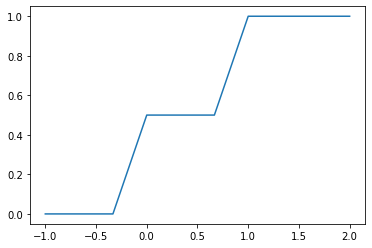

In [56]:
from scipy.stats import bernoulli
# Here set up the parameters for the bernoulli distribution.
p = 0.5
dist = bernoulli(0.5)
# Set up the sample range.
x = np.linspace(-1, 2, 10)
# Retrieving geom's PMF and CDF
pmf = dist.pmf(x)
cdf = dist.cdf(x)
# Here we draw out 500 random values.
sample = dist.rvs(500)
plt.plot(x, pmf)
plt.show()
plt.plot(x, cdf)

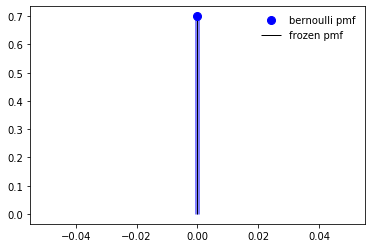

0.0

1.0

True

array([0.])

array([0.])

In [62]:
# check accuracy of cdf and ppf
fig, ax = plt.subplots(1, 1)
p = 0.3
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
ax.plot(x, bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')
ax.vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)
rv = bernoulli(p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()


bernoulli.ppf(0.01,p)
bernoulli.ppf(0.99,p)
x = np.arange(bernoulli.ppf(0.01,p),bernoulli.ppf(0.99,p))
prob = bernoulli.cdf(x,p)
np.allclose(x, bernoulli.ppf(prob,p))
x
bernoulli.ppf(prob,p)

In [41]:
help(bernoulli)

Help on bernoulli_gen in module scipy.stats._discrete_distns object:

class bernoulli_gen(binom_gen)
 |  bernoulli_gen(a=0, b=inf, name=None, badvalue=None, moment_tol=1e-08, values=None, inc=1, longname=None, shapes=None, extradoc=None, seed=None)
 |  
 |  A Bernoulli discrete random variable.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The probability mass function for `bernoulli` is:
 |  
 |  .. math::
 |  
 |     f(k) = \begin{cases}1-p  &\text{if } k = 0\\
 |                         p    &\text{if } k = 1\end{cases}
 |  
 |  for :math:`k` in :math:`\{0, 1\}`.
 |  
 |  `bernoulli` takes :math:`p` as shape parameter.
 |  
 |  %(after_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      bernoulli_gen
 |      binom_gen
 |      scipy.stats._distn_infrastructure.rv_discrete
 |      scipy.stats._distn_infrastructure.rv_generic
 |      builtins.object
 |  
 |  Methods inherited from scipy.stats._distn_infrastructure.rv_discrete:
 |  
 |  __init__(self, a=0, b=

#### 几何分布

(0, 9)

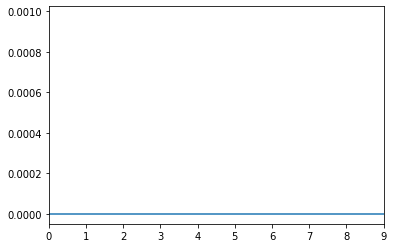

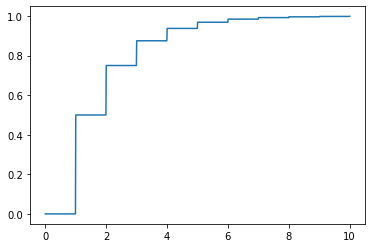

In [6]:
from scipy.stats import geom
# Here set up the parameters for the geometric distribution.
p = 0.5
dist = geom(p)
# Set up the sample range.
x = np.linspace(0, 10, 1000)
# Retrieving geom's PMF and CDF
pmf = dist.pmf(x)
cdf = dist.cdf(x)
# Here we draw out 500 random values.
sample = dist.rvs(500)
plt.plot(x, pmf)
# plt.xlim(0,9)
plt.show()
plt.plot(x, cdf)

#### 均匀分布  
uniform(start,lengh)(自己总结的）

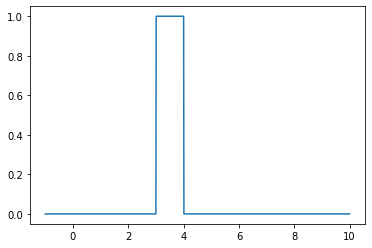

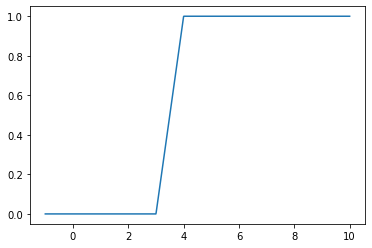

In [38]:
from scipy.stats import uniform
# Here set up the parameters for the geometric distribution.

dist = uniform(3,1)
# Set up the sample range.
x = np.linspace(-1, 10, 1000)
# Retrieving geom's PMF and CDF
pdf = dist.pdf(x)
cdf = dist.cdf(x)
# Here we draw out 500 random values.
sample = dist.rvs(500)
plt.plot(x, pdf)
plt.show()
plt.plot(x, cdf)

## 函数

In [148]:
from scipy import stats
# Generating a normal distribution sample
# with 100 elements
sample = np.random.randn(100)
# normaltest tests the null hypothesis.
out = stats.normaltest(sample)
print('normaltest output')
print('Z-score='+ str(out[0]))
print('P-value='+ str(out[1]))
# kstest is the Kolmogorov-Smirnov test for goodness of fit.
# Here its sample is being tested against the normal distribution.
# D is the KS statistic and the closer it is to 0 the better.
out = stats.kstest(sample, 'norm')
print('\nkstest output for the Normal distribution')
print('D='+ str(out[0]))
print('P-value='+ str(out[1]))
# Similarly, this can be easily tested against other distributions,
# like the Wald distribution.
out = stats.kstest(sample, 'wald')
print('\nkstest output for the Wald distribution')
print('D='+ str(out[0]))
print('P-value='+ str(out[1]))

normaltest output
Z-score=0.5296263369843258
P-value=0.7673493016111953

kstest output for the Normal distribution
D=0.06885852992914288
P-value=0.7408485341754981

kstest output for the Wald distribution
D=0.5381874555552337
P-value=1.2697289837906749e-27


In [150]:
from scipy import stats
# Generating a normal distribution sample
# with 100 elements
sample = np.random.randn(100)
# The harmonic mean: Sample values have to
# be greater than 0.
out = stats.hmean(sample[sample > 0])
print('Harmonic mean='+ str(out))
# The mean, where values below -1 and above 1 are
# removed for the mean calculation
out = stats.tmean(sample, limits=(-1, 1))
print('\nTrimmed mean='+ str(out))
# Calculating the skewness of the sample
out = stats.skew(sample)
print('\nSkewness='+ str(out))
# Additionally, there is a handy summary function called
# describe, which gives a quick look at the data.
out = stats.describe(sample)
print('\nSize='+ str(out[0]))
print('Min='+ str(out[1][0]))
print('Max='+ str(out[1][1]))
print('Mean='+ str(out[2]))
print('Variance='+ str(out[3]))
print('Skewness='+ str(out[4]))
print('Kurtosis='+ str(out[5]))

Harmonic mean=0.32645424035291687

Trimmed mean=0.0329158253046738

Skewness=-0.05306193064818457

Size=100
Min=-2.3727665321130447
Max=2.305672377158199
Mean=0.18682604768000136
Variance=0.8666693243189519
Skewness=-0.05306193064818457
Kurtosis=-0.004613753845254198


# 空间与聚类分析

## 矢量量化

In [151]:
from scipy.cluster import vq
# Creating data
c1 = np.random.randn(100, 2) + 5
c2 = np.random.randn(30, 2) - 5
c3 = np.random.randn(50, 2)
# Pooling all the data into one 180 x 2 array
data = np.vstack([c1, c2, c3])
# Calculating the cluster centroids and variance
# from kmeans
centroids, variance = vq.kmeans(data, 3)
# The identified variable contains the information
# we need to separate the points in clusters
# based on the vq function.
identified, distance = vq.vq(data, centroids)
# Retrieving coordinates for points in each vq
# identified core
vqc1 = data[identified == 0]
vqc2 = data[identified == 1]
vqc3 = data[identified == 2]

## 分层聚类

In [155]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import pdist, squareform
import scipy.cluster.hierarchy as hy
# Creating a cluster of clusters function
def clusters(number = 20, cnumber = 5, csize = 10):
    # Note that the way the clusters are positioned is Gaussian randomness.
    rnum = np.random.rand(cnumber, 2)
    rn = rnum[:,0] * number
    rn = rn.astype(int)
    rn[np.where(rn < 5 )] = 5
    rn[np.where(rn > number/2. )] = round(number / 2., 0)
    ra = rnum[:,1] * 2.9
    ra[np.where(ra < 1.5)] = 1.5
    cls = np.random.randn(number, 3) * csize
    # Random multipliers for central point of cluster
    rxyz = np.random.randn(cnumber-1, 3)
    for i in xrange(cnumber-1):
        tmp = np.random.randn(rn[i+1], 3)
        x = tmp[:,0] + ( rxyz[i,0] * csize )
        y = tmp[:,1] + ( rxyz[i,1] * csize )
        z = tmp[:,2] + ( rxyz[i,2] * csize )
        tmp = np.column_stack([x,y,z])
        cls = np.vstack([cls,tmp])
    return cls
# Generate a cluster of clusters and distance matrix.
cls = clusters()
D = pdist(cls[:,0:2])
D = squareform(D)
# Compute and plot first dendrogram.
fig = mpl.figure(figsize=(8,8))
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
Y1 = hy.linkage(D, method='complete')
cutoff = 0.3 * np.max(Y1[:, 2])
Z1 = hy.dendrogram(Y1, orientation='right', color_threshold=cutoff)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Y2 = hy.linkage(D, method='average')
cutoff = 0.3 * np.max(Y2[:, 2])
Z2 = hy.dendrogram(Y2, color_threshold=cutoff)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
# Plot distance matrix.
ax3 = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = D[idx1,:]
D = D[:,idx2]
ax3.matshow(D, aspect='auto', origin='lower', cmap=mpl.cm.YlGnBu)
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
# Plot colorbar.
# fig.savefig('cluster_hy_f01.pdf', bbox = 'tight')

NameError: name 'xrange' is not defined

In [159]:
# Same imports and cluster function from the previous example
# follow through here.
# Here we define a function to collect the coordinates of
# each point of the different clusters.
def group(data, index):
    number = np.unique(index)
    groups = []
    for i in number:
        groups.append(data[index == i])
    return groups

# Creating a cluster of clusters
cls = clusters()
# Calculating the linkage matrix
Y = hy.linkage(cls[:,0:2], method='complete')
# Here we use the fcluster function to pull out a
# collection of flat clusters from the hierarchical
# data structure. Note that we are using the same
# cutoff value as in the previous example for the dendrogram
# using the 'complete' method.
cutoff = 0.3 * np.max(Y[:, 2])
index = hy.fcluster(Y, cutoff, 'distance')
# Using the group function, we group points into their
# respective clusters.
groups = group(cls, index)
# Plotting clusters
fig = mpl.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
colors = ['r', 'c', 'b', 'g', 'orange', 'k', 'y', 'gray']
for i, g in enumerate(groups):
    i = np.mod(i, len(colors))
    ax.scatter(g[:,0], g[:,1], c=colors[i], edgecolor='none', s=50)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
# fig.savefig('cluster_hy_f02.pdf', bbox = 'tight')

NameError: name 'xrange' is not defined

# 信号和图像处理

In [161]:
from scipy.misc import imread, imsave
from glob import glob
# Getting the list of files in the directory
files = glob('space/*.JPG')
# Opening up the first image for loop
im1 = imread(files[0]).astype(np.float32)
# Starting loop and continue co-adding new images
for i in xrange(1, len(files)):
    print(i)
    im1 += imread(files[i]).astype(np.float32)
# Saving img
# imsave('stacked_image.jpg', im1)

ImportError: cannot import name 'imread' from 'scipy.misc' (D:\MySoft\Anaconda3\lib\site-packages\scipy\misc\__init__.py)

In [ ]:
from scipy.misc import imread, imsave
from glob import glob
# This function allows us to place in the
# brightest pixels per x and y position between
# two images. It is similar to PIL's
# ImageChop.Lighter function.
def chop_lighter(image1, image2):
    s1 = np.sum(image1, axis=2)
    s2 = np.sum(image2, axis=2)
    index = s1 < s2
    image1[index, 0] = image2[index, 0]
    image1[index, 1] = image2[index, 1]
    image1[index, 2] = image2[index, 2]
    return image1
# Getting the list of files in the directory
files = glob('space/*.JPG')
# Opening up the first image for looping
im1 = imread(files[0]).astype(np.float32)
im2 = np.copy(im1)
# Starting loop
for i in xrange(1, len(files)):
    print(i)
    im = imread(files[i]).astype(np.float32)
    # Same before
    im1 += im
    # im2 shows star trails better
    im2 = chop_lighter(im2, im)
# Saving image with slight tweaking on the combination
# of the two images to show star trails with the
# co-added image.
# imsave('stacked_image.jpg', im1/im1.max() + im2/im2.max()*0.2)

# 稀疏矩阵

## API  
1. csc_matrix(numpy矩阵采用)
2. csr_matrix
3. coo_matrix

coo_matrix是三元组，不能按行也不能按列切片  
csr_matrix 是按行压缩的稀疏矩阵，按行切片比较快，可以按列切片  
csc_matrix 是按列压缩的稀疏矩阵，按列切片比较快，可以按行切片 

* 重要属性
    * data　(all)
    * row　(coo)
    * col　(coo)

* 重要方法：
    * tocsc()
    * tocsr()
    * tocoo()
    * toarray()
    * todense()

[稀疏矩阵](https://www.cnblogs.com/zhangchaoyang/articles/5483453.html)

In [3]:
from scipy.sparse import coo_matrix, csr_matrix, csc_matrix
help(coo_matrix)

In [47]:
row = np.array([0, 0, 1, 1, 2, 3, 4])
col = np.array([0, 2, 1, 2, 0, 2, 1])
data = np.array([1, 1, 1, 1, 1, 1, 1])
adj = coo_matrix((data, (row, col)), shape=(5, 5))
type(adj)
# adj = np.random.randn(10,10)
adj.toarray()
type(adj)
adj.data
adj.row
adj.col
adj = adj + adj.T.multiply(adj.T > adj) # 经过运算后coo转csr了
type(adj)
adj.toarray()

# dir(ccm)
type(adj)

scipy.sparse.coo.coo_matrix

array([[1, 0, 1, 0, 0],
       [0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0]])

scipy.sparse.coo.coo_matrix

array([1, 1, 1, 1, 1, 1, 1])

array([0, 0, 1, 1, 2, 3, 4])

array([0, 2, 1, 2, 0, 2, 1])

scipy.sparse.csr.csr_matrix

array([[1, 0, 1, 0, 0],
       [0, 1, 1, 0, 1],
       [1, 1, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0]], dtype=int32)

scipy.sparse.csr.csr_matrix

In [46]:
adj.tocsc()
adj.tocsr()
adj.tocoo()
adj.toarray()
adj.todense()

<5x5 sparse matrix of type '<class 'numpy.intc'>'
	with 7 stored elements in Compressed Sparse Column format>

<5x5 sparse matrix of type '<class 'numpy.intc'>'
	with 7 stored elements in Compressed Sparse Row format>

<5x5 sparse matrix of type '<class 'numpy.int32'>'
	with 7 stored elements in COOrdinate format>

array([[1, 0, 1, 0, 0],
       [0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0]])

matrix([[1, 0, 1, 0, 0],
        [0, 1, 1, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0]])

### coo_matrix

In [23]:
help(coo_matrix)

Help on class coo_matrix in module scipy.sparse.coo:

class coo_matrix(scipy.sparse.data._data_matrix, scipy.sparse.data._minmax_mixin)
 |  coo_matrix(arg1, shape=None, dtype=None, copy=False)
 |  
 |  A sparse matrix in COOrdinate format.
 |  
 |  Also known as the 'ijv' or 'triplet' format.
 |  
 |  This can be instantiated in several ways:
 |      coo_matrix(D)
 |          with a dense matrix D
 |  
 |      coo_matrix(S)
 |          with another sparse matrix S (equivalent to S.tocoo())
 |  
 |      coo_matrix((M, N), [dtype])
 |          to construct an empty matrix with shape (M, N)
 |          dtype is optional, defaulting to dtype='d'.
 |  
 |      coo_matrix((data, (i, j)), [shape=(M, N)])
 |          to construct from three arrays:
 |              1. data[:]   the entries of the matrix, in any order
 |              2. i[:]      the row indices of the matrix entries
 |              3. j[:]      the column indices of the matrix entries
 |  
 |          Where ``A[i[k], j[k]] = da

In [39]:
row = np.array([0, 0, 1, 1, 2, 3, 4])
col = np.array([0, 2, 1, 2, 0, 2, 1])
data = np.array([1, 1, 1, 1, 1, 1, 1])
com = coo_matrix((data, (row, col)), shape=(5, 5))
com.toarray()
#不能切片
# com[:3]
# com[:,:3]
# com[:3,:]



array([[1, 0, 1, 0, 0],
       [0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0]])

TypeError: 'coo_matrix' object is not subscriptable

### csc_matrix

In [22]:
help(csc_matrix)

Help on class csc_matrix in module scipy.sparse.csc:

class csc_matrix(scipy.sparse.compressed._cs_matrix)
 |  csc_matrix(arg1, shape=None, dtype=None, copy=False)
 |  
 |  Compressed Sparse Column matrix
 |  
 |  This can be instantiated in several ways:
 |  
 |      csc_matrix(D)
 |          with a dense matrix or rank-2 ndarray D
 |  
 |      csc_matrix(S)
 |          with another sparse matrix S (equivalent to S.tocsc())
 |  
 |      csc_matrix((M, N), [dtype])
 |          to construct an empty matrix with shape (M, N)
 |          dtype is optional, defaulting to dtype='d'.
 |  
 |      csc_matrix((data, (row_ind, col_ind)), [shape=(M, N)])
 |          where ``data``, ``row_ind`` and ``col_ind`` satisfy the
 |          relationship ``a[row_ind[k], col_ind[k]] = data[k]``.
 |  
 |      csc_matrix((data, indices, indptr), [shape=(M, N)])
 |          is the standard CSC representation where the row indices for
 |          column i are stored in ``indices[indptr[i]:indptr[i+1]]``
 |   

In [25]:
row = np.array([0, 2, 2, 0, 1, 2])
col = np.array([0, 0, 1, 2, 2, 2])
data = np.array([1, 2, 3, 4, 5, 6])
csc_matrix((data, (row, col)), shape=(3, 3)).toarray()

array([[1, 0, 4],
       [0, 0, 5],
       [2, 3, 6]], dtype=int32)

In [24]:
indptr = np.array([0, 2, 3, 6])
indices = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])
csc_matrix((data, indices, indptr), shape=(3, 3)).toarray()

array([[1, 0, 4],
       [0, 0, 5],
       [2, 3, 6]])

In [43]:
data = np.random.randint(0,2,size=(100,100))
ccm = csc_matrix(data)
# data
# ccm
%timeit ccm[10:20] # 按行切片
%timeit ccm[:,10:20] # 按列切片
# %timeit ccm[:3,:]

73.6 µs ± 2.99 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
58.9 µs ± 2.15 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### csr_matrix

<img alt="" class="has" height="360" src="https://img-blog.csdnimg.cn/20190617222258606.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTIxMDE1NjE=,size_16,color_FFFFFF,t_70" width="687">

In [21]:
help(csr_matrix)

Help on class csr_matrix in module scipy.sparse.csr:

class csr_matrix(scipy.sparse.compressed._cs_matrix)
 |  csr_matrix(arg1, shape=None, dtype=None, copy=False)
 |  
 |  Compressed Sparse Row matrix
 |  
 |  This can be instantiated in several ways:
 |      csr_matrix(D)
 |          with a dense matrix or rank-2 ndarray D
 |  
 |      csr_matrix(S)
 |          with another sparse matrix S (equivalent to S.tocsr())
 |  
 |      csr_matrix((M, N), [dtype])
 |          to construct an empty matrix with shape (M, N)
 |          dtype is optional, defaulting to dtype='d'.
 |  
 |      csr_matrix((data, (row_ind, col_ind)), [shape=(M, N)])
 |          where ``data``, ``row_ind`` and ``col_ind`` satisfy the
 |          relationship ``a[row_ind[k], col_ind[k]] = data[k]``.
 |  
 |      csr_matrix((data, indices, indptr), [shape=(M, N)])
 |          is the standard CSR representation where the column indices for
 |          row i are stored in ``indices[indptr[i]:indptr[i+1]]`` and their
 | 

In [26]:
row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])
csr_matrix((data, (row, col)), shape=(3, 3)).toarray()

array([[1, 0, 2],
       [0, 0, 3],
       [4, 5, 6]], dtype=int32)

In [27]:
indptr = np.array([0, 2, 3, 6])
indices = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])
csr_matrix((data, indices, indptr), shape=(3, 3)).toarray()

array([[1, 0, 2],
       [0, 0, 3],
       [4, 5, 6]])

In [45]:
data = np.random.randint(0,2,size=(100,100))
crm = csc_matrix(data)
# data
# crm
%timeit crm[10:20] # 按行切片
%timeit crm[:,10:20] # 按列切片
# crm[:3]
# crm[:,:3]
# crm[:3,:]

72.5 µs ± 2.85 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
62.2 µs ± 4.86 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## 计算稀疏矩阵特征值

In [19]:
from scipy.sparse.linalg import eigsh
from scipy.linalg import eigh
import scipy.sparse
import time
N = 1000
# Creating a random sparse matrix
# rand(m, n, density=0.01, format='coo', dtype=None, random_state=None)
m = scipy.sparse.rand(N, N, density=0.01)
# m
# Creating an array clone of it
a = m.toarray()
# a
print('The numpy array data size: ' + str(a.nbytes) + ' bytes')
print('The sparse matrix data size: ' + str(m.data.nbytes) + ' bytes')
# Non-sparse
t0 = time.time()
res1 = eigh(a)
# res1
dt = str(np.round(time.time() - t0, 3)) + ' seconds'
print('Non-sparse operation takes ' + dt)
# Sparse
t0 = time.time()
res2 = eigsh(m)
# res1
dt = str(np.round(time.time() - t0, 3)) + ' seconds'
print('Sparse operation takes ' + dt)

The numpy array data size: 8000000 bytes
The sparse matrix data size: 80000 bytes
Non-sparse operation takes 0.174 seconds
Sparse operation takes 0.02 seconds


## 稠密转稀疏

In [20]:
# dense to sparse
from scipy.sparse import csr_matrix
# create dense matrix
A = np.array([[1, 0, 0, 1, 0, 0], [0, 0, 2, 0, 0, 1], [0, 0, 0, 2, 0, 0]])
A
# convert to sparse matrix (CSR method)
S = csr_matrix(A)
S
# reconstruct dense matrix
B = S.todense()
B

array([[1, 0, 0, 1, 0, 0],
       [0, 0, 2, 0, 0, 1],
       [0, 0, 0, 2, 0, 0]])

<3x6 sparse matrix of type '<class 'numpy.intc'>'
	with 5 stored elements in Compressed Sparse Row format>

matrix([[1, 0, 0, 1, 0, 0],
        [0, 0, 2, 0, 0, 1],
        [0, 0, 0, 2, 0, 0]], dtype=int32)

## 计算稀疏性

In [21]:
# create dense matrix
A = np.array([[1, 0, 0, 1, 0, 0], [0, 0, 2, 0, 0, 1], [0, 0, 0, 2, 0, 0]])
print(A)
# calculate sparsity
sparsity = 1.0 - np.count_nonzero(A) / A.size
print(sparsity)

[[1 0 0 1 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]
0.7222222222222222


# 傅里叶变换

[傅里叶变换通俗解释及快速傅里叶变换的python实现](https://www.cnblogs.com/tianqizhi/p/10850377.html)

In [3]:
from scipy.fftpack import fft,ifft

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, '原始波形')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, '原始部分波形（前50组样本）')

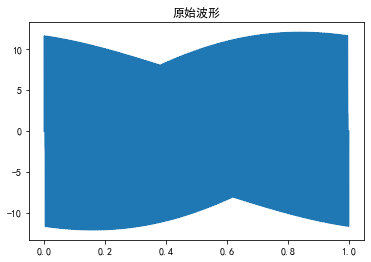

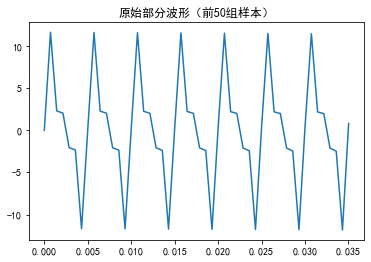

In [21]:
#采样点选择1400个，因为设置的信号频率分量最高为600赫兹，根据采样定理知采样频率要大于信号频率2倍，所以这里设置采样频率为1400赫兹（即一秒内有1400个采样点，一样意思的）
x=np.linspace(0,1,1400)      
  
#设置需要采样的信号，频率分量有200，400和600
y=7*np.sin(2*np.pi*200*x) + 5*np.sin(2*np.pi*400*x)+3*np.sin(2*np.pi*600*x)
plt.figure()
plt.plot(x,y)   
plt.title('原始波形')
  
plt.figure()
plt.plot(x[0:50],y[0:50])   
plt.title('原始部分波形（前50组样本）')
plt.show()

In [31]:
fft_y=fft(y)                          #快速傅里叶变换
print(len(fft_y))
print(fft_y[199:201])
# np.sqrt(256.26**2+535.19**2)
np.abs(fft_y[199:201])
np.angle(fft_y[199:201])
np.real(fft_y[199:201])
np.imag(fft_y[199:201])

1400
[ 256.26 -535.19j 2055.67-4268.65j]


array([ 593.38, 4737.85])

array([-1.12, -1.12])

array([ 256.26, 2055.67])

array([ -535.19, -4268.65])

array([ 593.38, 4737.85,  789.2 ,  363.68,  236.02,  174.54,  138.36,
        114.53,   97.64,   85.04,   75.28])

<Figure size 432x288 with 0 Axes>

D:\MySoft\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, '双边振幅谱（未归一化）')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, '双边相位谱（未归一化）')

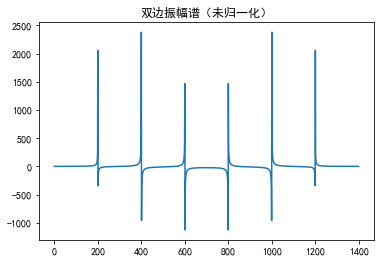

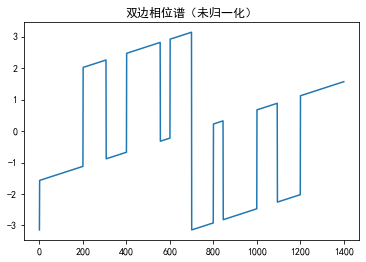

In [36]:
N=1400
x = np.arange(N)           # 频率个数
  
abs_y=np.abs(fft_y)                # 取复数的绝对值，即复数的模(双边频谱)
angle_y=np.angle(fft_y)              #取复数的角度
abs_y[199:210]
plt.figure()
# plt.plot(x,fft_y)  
plt.plot(x,abs_y)
plt.title('双边振幅谱（未归一化）')
  
plt.figure()
plt.plot(x,angle_y)   
plt.title('双边相位谱（未归一化）')
plt.show()

array([0.42, 3.38, 0.56, 0.26, 0.17, 0.12, 0.1 , 0.08, 0.07, 0.06, 0.05])

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, '双边频谱(归一化)')

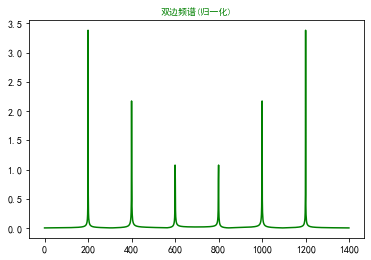

In [32]:
normalization_y=abs_y/N            #归一化处理（双边频谱）
normalization_y[199:210]
plt.figure()
plt.plot(x,normalization_y,'g')
plt.title('双边频谱(归一化)',fontsize=9,color='green')
plt.show()

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, '单边频谱(归一化)')

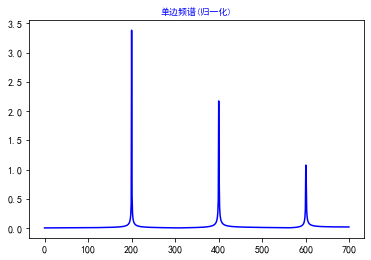

In [9]:
half_x = x[range(int(N/2))]                                  #取一半区间
normalization_half_y = normalization_y[range(int(N/2))]      #由于对称性，只取一半区间（单边频谱）
plt.figure()
plt.plot(half_x,normalization_half_y,'b')
plt.title('单边频谱(归一化)',fontsize=9,color='blue')
plt.show()

Text(0.5, 1.0, '原始波形')

D:\MySoft\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, '双边振幅谱(未求振幅绝对值)')

Text(0.5, 1.0, '双边振幅谱(未归一化)')

Text(0.5, 1.0, '双边相位谱(未归一化)')

Text(0.5, 1.0, '双边振幅谱(归一化)')

Text(0.5, 1.0, '单边振幅谱(归一化)')

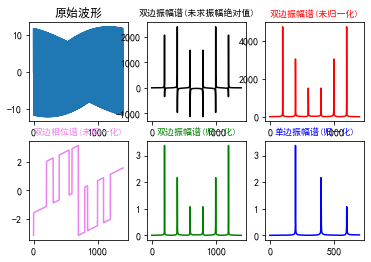

In [10]:
#采样点选择1400个，因为设置的信号频率分量最高为600赫兹，根据采样定理知采样频率要大于信号频率2倍，所以这里设置采样频率为1400赫兹（即一秒内有1400个采样点，一样意思的）
x=np.linspace(0,1,1400)      
  
#设置需要采样的信号，频率分量有200，400和600
y=7*np.sin(2*np.pi*200*x) + 5*np.sin(2*np.pi*400*x)+3*np.sin(2*np.pi*600*x)
  
fft_y=fft(y)                          #快速傅里叶变换
  
N=1400
x = np.arange(N)             # 频率个数
half_x = x[range(int(N/2))]  #取一半区间
  
abs_y=np.abs(fft_y)                # 取复数的绝对值，即复数的模(双边频谱)
angle_y=np.angle(fft_y)            #取复数的角度
normalization_y=abs_y/N            #归一化处理（双边频谱）                              
normalization_half_y = normalization_y[range(int(N/2))]      #由于对称性，只取一半区间（单边频谱）
  
plt.subplot(231)
plt.plot(x,y)   
plt.title('原始波形')
  
plt.subplot(232)
plt.plot(x,fft_y,'black')
plt.title('双边振幅谱(未求振幅绝对值)',fontsize=9,color='black') 
  
plt.subplot(233)
plt.plot(x,abs_y,'r')
plt.title('双边振幅谱(未归一化)',fontsize=9,color='red') 
  
plt.subplot(234)
plt.plot(x,angle_y,'violet')
plt.title('双边相位谱(未归一化)',fontsize=9,color='violet')
  
plt.subplot(235)
plt.plot(x,normalization_y,'g')
plt.title('双边振幅谱(归一化)',fontsize=9,color='green')
  
plt.subplot(236)
plt.plot(half_x,normalization_half_y,'blue')
plt.title('单边振幅谱(归一化)',fontsize=9,color='blue')
  
plt.show()

# wait  
[Python机器学习及分析工具：Scipy篇](https://www.jianshu.com/p/6c742912047f)

# 2  
[scipy.stats与统计学：4个概率分布：N，chi2，F，t](https://blog.csdn.net/moon_wander/article/details/80425127)

In [ ]:
正态分布

In [ ]:
概率密度函数

In [ ]:
概率分布函数

In [ ]:
数学期望

In [ ]:
分位数

In [ ]:
最大似然估计